<a href="https://colab.research.google.com/github/halim-jun/Ai_study/blob/master/20200811_Diabetes_Handcoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 데이터 가져오기

In [1]:
import seaborn as sns
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.metrics import accuracy_score
diabetes=load_diabetes()
diabetes.keys()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [2]:
df_X=diabetes.data
df_Y=diabetes.target

In [3]:
df_X[1:10,:]

array([[-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338, -0.06291295, -0.03835666],
       [ 0.06350368,  0.05068012, -0.00189471,  0.06662967,  0.09061988,
         0.10891438,  0.02286863,  0.01770335

# 2-3. 데이터 타입 변환하기 : 이미 numpy array 이기에 변환하지 않음

In [4]:
type(df_X)
type(df_Y)

numpy.ndarray

# 4.  트레인/테스트 스플릿

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
(x_train, x_test, y_train, y_test)=train_test_split(df_X, df_Y, random_state=10, test_size=0.2)

In [7]:
x_test.shape
x_train.shape
y_train.shape

(353,)

#5. 모델 준비하기

In [8]:
def model(X,w,b):
  prediction=0
  for i in range(10):
    prediction+=X[:, i]*w[i] #모든 X 에 대해서 예측값 도출
  prediction+=b
  return prediction

#6. 손실함수 준비하기

In [15]:
def MSE(a,b):
  mse=((a-b)**2).mean()
  return mse
def loss(x,y,w,b):
  prediction=model(x,w,b)
  L=MSE(prediction, y)
  return L

#7. Gradient 구하기

In [16]:
def gradient(X, W, b, y):
    N = len(W)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    db = 2 * (y_pred - y).mean()
    return dW, db

#8. Learning rate 구하기

In [17]:
LEARNING_RATE = 0.001

# 9. 모델 학습하기

In [18]:
losses = []
W=[2,2,2,2,2,2,2,2,2,2]
b=1

for i in range(1, 100000):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(x_train, y_train,W,b)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Streaming output truncated to the last 5000 lines.
Iteration 50010 : Loss 2868.1789
Iteration 50020 : Loss 2868.1784
Iteration 50030 : Loss 2868.1779
Iteration 50040 : Loss 2868.1774
Iteration 50050 : Loss 2868.1768
Iteration 50060 : Loss 2868.1763
Iteration 50070 : Loss 2868.1758
Iteration 50080 : Loss 2868.1753
Iteration 50090 : Loss 2868.1747
Iteration 50100 : Loss 2868.1742
Iteration 50110 : Loss 2868.1737
Iteration 50120 : Loss 2868.1732
Iteration 50130 : Loss 2868.1726
Iteration 50140 : Loss 2868.1721
Iteration 50150 : Loss 2868.1716
Iteration 50160 : Loss 2868.1711
Iteration 50170 : Loss 2868.1705
Iteration 50180 : Loss 2868.1700
Iteration 50190 : Loss 2868.1695
Iteration 50200 : Loss 2868.1690
Iteration 50210 : Loss 2868.1684
Iteration 50220 : Loss 2868.1679
Iteration 50230 : Loss 2868.1674
Iteration 50240 : Loss 2868.1669
Iteration 50250 : Loss 2868.1663
Iteration 50260 : Loss 2868.1658
Iteration 50270 : Loss 2868.1653
Iteration 50280 : Loss 2868.1648
Iteration 50290 : Loss 28

#10. 성능 확인

In [20]:
mse = loss(x_test, y_test, W, b)
mse

2940.314158912307

#11. 결과 시각화

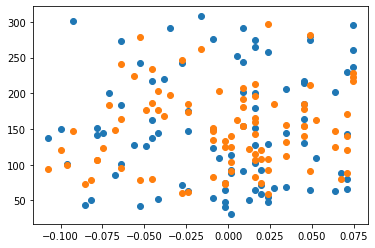

In [21]:
import matplotlib.pyplot as plt
plt.scatter(x_test[:, 0], y_test)
prediction=model(x_test,W,b)
plt.scatter(x_test[:, 0], prediction)
plt.show()


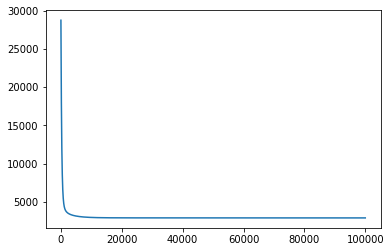

In [22]:
plt.plot(losses)

In [23]:
dW

array([ 0.00604748,  0.00741073,  0.01817629, -0.0016612 ,  0.87265434,
       -0.71309966, -0.35170268, -0.05411024, -0.35625526,  0.00523078])

89

89